<a href="https://colab.research.google.com/github/arjunkrishnasr/social-network-analytics-lab-digital-assessment2/blob/main/Walktrap_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Walktrap Algorithm for Community Detection**

**Arjun Krishna S R**

**22MCB0038**


In [7]:
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [2]:
def walktrap(G, num_clusters):
    # Calculate the normalized Laplacian matrix
    L = nx.normalized_laplacian_matrix(G)
    
    # Perform agglomerative clustering on the eigenvectors of the Laplacian matrix
    clustering = AgglomerativeClustering(n_clusters=num_clusters, affinity='precomputed', linkage='average')
    labels = clustering.fit_predict(L.toarray())
    
    # Group nodes based on labels
    communities = {}
    for i, label in enumerate(labels):
        if label not in communities:
            communities[label] = [i]
        else:
            communities[label].append(i)
    
    return list(communities.values())

In [3]:
# Create a random graph for demonstration
G = nx.erdos_renyi_graph(n=50, p=0.1)

In [4]:
# Perform community detection using Walktrap algorithm
detected_communities = walktrap(G, num_clusters=3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [5]:
# Visualize the graph and detected communities
pos = nx.spring_layout(G, seed=42)

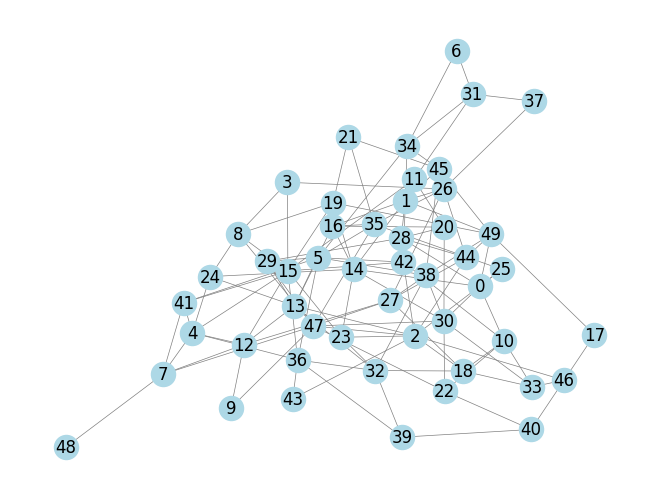

In [6]:
# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=0.5)

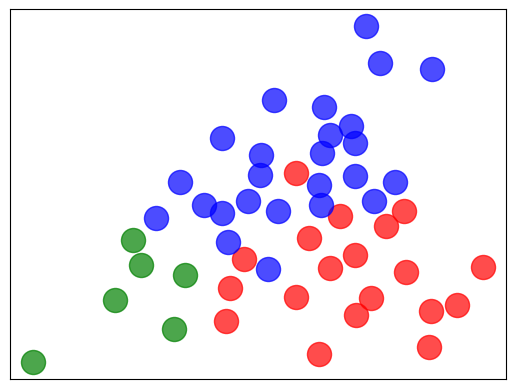

In [8]:
# Draw the detected communities
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, community in enumerate(detected_communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], alpha=0.7)